## **Schools in NYC**

![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# filling missing values
schools.fillna({'borough': 'Unknown', 'school_name': 'Unknown'}, inplace=True)
schools.fillna(0, inplace=True)
# Preview the data
schools.head()


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,0.0
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


### Best Math Schools in NYC

The best math results are at least _80%_ of the **maximum possible score of 800** for math.

In [2]:
maximum_possible_math_score = 800
threshold = maximum_possible_math_score*80/100
# subsetting schools with math score
math_schools = schools[['school_name', 'average_math']]
# subsetting the math_schools
best_math_schools = math_schools[math_schools['average_math']>=threshold]
# sorting best_math_schools
best_math_schools = best_math_schools.sort_values('average_math', ascending=False)
# resetting index
best_math_schools = best_math_schools.reset_index(drop=True)
best_math_schools

,school_name,average_math
0,Stuyvesant High School,754
1,Bronx High School of Science,714
2,Staten Island Technical High School,711
3,Queens High School for the Sciences at York Co...,701
4,"High School for Mathematics, Science, and Engi...",683
5,Brooklyn Technical High School,682
6,Townsend Harris High School,680
7,High School of American Studies at Lehman College,669
8,"New Explorations into Science, Technology and ...",657
9,Eleanor Roosevelt High School,641


### Top 10 performing schoosl based on the combined SAT score

In [3]:
# making column 'total_SAT'
schools['total_SAT'] = schools[['average_math', 'average_reading', 'average_writing']].sum(axis=1)
# subsetting schools by SAT score and sorting it in descending order
schools_by_SAT = schools[['school_name', 'total_SAT']].sort_values('total_SAT', ascending=False)
# subsetting top 10 schools and resetting index
top_10_schools = schools_by_SAT.head(10).reset_index(drop=True)
top_10_schools

,school_name,total_SAT
0,Stuyvesant High School,2144
1,Staten Island Technical High School,2041
2,Bronx High School of Science,2041
3,High School of American Studies at Lehman College,2013
4,Townsend Harris High School,1981
5,Queens High School for the Sciences at York Co...,1947
6,Bard High School Early College,1914
7,Brooklyn Technical High School,1896
8,"High School for Mathematics, Science, and Engi...",1889
9,Eleanor Roosevelt High School,1889


### Borough with largest standard deviation in the combined SAT

In [4]:
schools_by_borough = pd.DataFrame()

# grouping schools by borough
schools_by_borough['num_schools'] = schools.groupby('borough')['school_name'].count()

# making average_SAT column for each borough
schools_by_borough['average_SAT'] = schools.groupby('borough')['total_SAT'].mean().round(2)

# making std_SAT column for each borough
schools_by_borough['std_SAT'] = schools.groupby('borough')['total_SAT'].std().round(2)

# ordering schools_by_borough in descending order of std deviation
schools_by_borough = schools_by_borough.sort_values('std_SAT', ascending=False)

# taking out the borough with the largest standard deviation
largest_std_dev = schools_by_borough.head(1)
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


### Visualizing the data

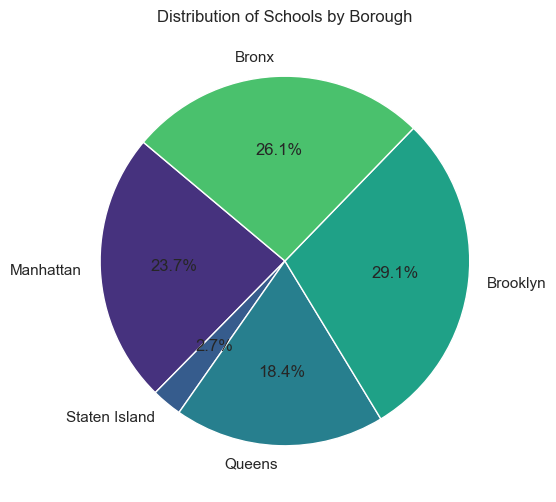

In [5]:
# distribution of schools by borough

sns.set_theme(style="whitegrid")
sns.set_palette("viridis")
plt.figure(figsize=(10,6))
plt.pie(schools_by_borough['num_schools'], labels=schools_by_borough.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Schools by Borough')
plt.show()

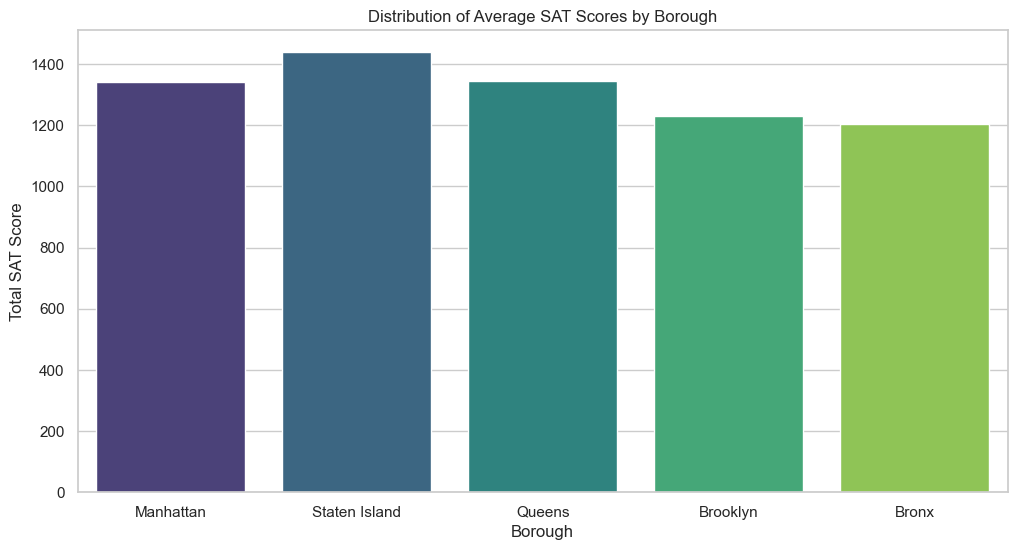

In [6]:
# distribution of average SAT scores by borough
plt.figure(figsize=(12,6))
sns.barplot(x='borough', y='average_SAT', data=schools_by_borough, hue='borough', palette="viridis")
plt.title('Distribution of Average SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Total SAT Score')
plt.show()
